In [1]:
#import necessary libraries and files 
import pandas as pd
import numpy as np
import warnings
import time
import datetime as dt
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import folium
import sklearn
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
path = "/Users/sreevathsadb/Masters/Project/Data/"
import plotly.express as px
#pd.set_option("display.max_columns",1000)
#pd.set_option('display.max_rows', 17544) 
#%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.model_selection import cross_validate

In [3]:
d = pd.read_csv('/Users/sreevathsadb/Masters/Project/Data/Bike_Trips_2013_2018.csv')

In [4]:
trips_per_day = d.groupby(['year','month','day','season', 'weekday','holiday'])['interactions', 'rebalance','bike_arr_dep'].sum().reset_index()
trips_per_day['trips'] = trips_per_day['interactions']/2
trips_per_day['trips']  = trips_per_day['trips'].apply(np.ceil)
trips_per_day['transformed_trips'] = (trips_per_day['interactions'] + abs(trips_per_day['bike_arr_dep']) - trips_per_day['rebalance'])/2
trips_per_day['transformed_trips']  = trips_per_day['transformed_trips'].apply(np.ceil)

In [5]:
trips_per_day['transformed_trips'].describe()

count    1532.000000
mean     4290.740862
std      1157.719571
min        18.000000
25%      3389.250000
50%      4714.000000
75%      5217.250000
max      5993.000000
Name: transformed_trips, dtype: float64

In [6]:
conditions = [
    (trips_per_day['transformed_trips'] <= 3000),
    (((trips_per_day['transformed_trips'] > 3000) & (trips_per_day['transformed_trips'] <= 5000)))]
values = ["0", "1"]
trips_per_day['trip_ind']  = np.select(conditions, values,default="2")
trips_per_day.sample(5)

,year,month,day,season,weekday,holiday,interactions,rebalance,bike_arr_dep,trips,transformed_trips,trip_ind
978,2017,6,23,Summer,Friday,casual_day,11498.0,1116.0,22.0,5749.0,5202.0,2
205,2015,5,10,Spring,Sunday,casual_day,6728.0,342.0,12.0,3364.0,3199.0,1
826,2017,1,22,Winter,Sunday,casual_day,5714.0,373.0,34.0,2857.0,2688.0,0
1343,2018,6,26,Summer,Tuesday,casual_day,12966.0,1777.0,-18.0,6483.0,5604.0,2
964,2017,6,9,Summer,Friday,casual_day,11814.0,1372.0,20.0,5907.0,5231.0,2


### Regression Algorithms 

In [7]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [8]:
reg_df = trips_per_day.copy()

reg_df['season'] = reg_df["season"].astype("category")
reg_df['weekday'] = reg_df["weekday"].astype("category")
reg_df['holiday'] = reg_df["holiday"].astype("category")
reg_df['month'] = reg_df["month"].astype("category")
reg_df['trip_ind'] = reg_df["trip_ind"].astype("category")

df1 = pd.get_dummies(reg_df['season'])
df2 = pd.get_dummies(reg_df['weekday'])
df3 = pd.get_dummies(reg_df['holiday'])
df4 = pd.get_dummies(reg_df['trip_ind'])
reg_df = pd.concat([reg_df,df1,df2,df3,df4], axis=1).reindex(reg_df.index)

X_R = reg_df.drop(['year','day', 'season', 'weekday', 'holiday', 'interactions','rebalance', 'bike_arr_dep', 'trips', 'transformed_trips','trip_ind'], axis = 1)

Y_R = reg_df['transformed_trips']

cv_reg_data_x = X_R
cv_reg_data_y = Y_R

In [29]:
reg_df

,year,month,day,season,weekday,holiday,interactions,rebalance,bike_arr_dep,trips,...,May Day,New Year's Day,New Year's Day (Observed),October Bank Holiday,St. Patrick's Day,St. Patrick's Day (Observed),St. Stephen's Day,St. Stephen's Day (Observed),Summer Bank Holiday,casual_day
0,2013,11,28,Autumn,Thursday,casual_day,62.0,48.0,-52.0,31.0,...,0,0,0,0,0,0,0,0,0,1
1,2013,11,29,Autumn,Friday,casual_day,34.0,32.0,-34.0,17.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,12,4,Winter,Wednesday,casual_day,45.0,41.0,-45.0,23.0,...,0,0,0,0,0,0,0,0,0,1
3,2014,10,16,Autumn,Thursday,casual_day,11428.0,876.0,28.0,5714.0,...,0,0,0,0,0,0,0,0,0,1
4,2014,10,17,Autumn,Friday,casual_day,10588.0,710.0,-34.0,5294.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,2018,12,27,Winter,Thursday,casual_day,5475.0,428.0,33.0,2738.0,...,0,0,0,0,0,0,0,0,0,1
1528,2018,12,28,Winter,Friday,casual_day,5990.0,346.0,-90.0,2995.0,...,0,0,0,0,0,0,0,0,0,1
1529,2018,12,29,Winter,Saturday,casual_day,5285.0,377.0,37.0,2643.0,...,0,0,0,0,0,0,0,0,0,1
1530,2018,12,30,Winter,Sunday,casual_day,5316.0,372.0,4.0,2658.0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
reg_df.columns

Index(['year', 'month', 'day', 'season', 'weekday', 'holiday', 'interactions',
       'rebalance', 'bike_arr_dep', 'trips', 'transformed_trips', 'trip_ind',
       'Autumn', 'Spring', 'Summer', 'Winter', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Christmas Day',
       'Christmas Day (Observed)', 'Easter Monday', 'June Bank Holiday',
       'May Day', 'New Year's Day', 'New Year's Day (Observed)',
       'October Bank Holiday', 'St. Patrick's Day',
       'St. Patrick's Day (Observed)', 'St. Stephen's Day',
       'St. Stephen's Day (Observed)', 'Summer Bank Holiday', 'casual_day',
       '0', '1', '2'],
      dtype='object')

In [10]:
X_R = np.array(X_R)
Y_R = np.array(Y_R)

# scale our values to give them all equal importance. Scaling is also important from a clustering perspective as the distance between points affects the way clusters are formed.
#X_R = StandardScaler().fit_transform(X_R)
#Y_R = np.sqrt(df_reg['transformed_trips'])
#Y_R = StandardScaler().fit_transform(Y_R)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(X_R,Y_R, test_size = 0.3,random_state=0)
print("X_train has these samples:", x_train_reg.shape)
print("X_test has these samples:", x_test_reg.shape)
print("Y_train has these samples:", len(y_train_reg))
print("Y_train has these samples:", len(y_test_reg))

X_train has these samples: (1072, 29)
X_test has these samples: (460, 29)
Y_train has these samples: 1072
Y_train has these samples: 460


In [11]:
reg_models = ["Linear Regression","Ridge Regression with CV","Decision Tree","Gradient Boosting Regressor","Random Forest Regressor"]

regressors = [
               LinearRegression(),
               linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13)),
               tree.DecisionTreeRegressor(),
               GradientBoostingRegressor(random_state=0),
               RandomForestRegressor(random_state=0)
             ]

for name, regr in zip(reg_models, regressors):
    m = regr.fit(x_train_reg, y_train_reg)
    regr.fit(x_train_reg, y_train_reg)
    y_pred = regr.predict(x_test_reg)
    y_pred[y_pred<0] = 0
    R2_Score = np.sqrt(regr.score(x_test_reg,y_test_reg))
    RMSE = np.sqrt(mean_squared_error(y_test_reg, y_pred))
    RMSLE = np.sqrt(mean_squared_log_error( y_test_reg, y_pred))
    MAE = mean_absolute_error(y_test_reg,y_pred)
    NRMSE = RMSE/(y_test_reg.mean())
    #print("MAE",mean_absolute_error(y_test,y_pred))
    print("--------- ",name,"model metrics","---------- ")
    
    print("R2_Score:",R2_Score)
    print("MAE:",MAE)
    print("RMSE:",RMSE)
    print("RMSLE:",RMSLE)
    print("NRMSE:",NRMSE)

---------  Linear Regression model metrics ---------- 
R2_Score: 0.9062298929408658
MAE: 333.12907065513434
RMSE: 497.91583906210326
RMSLE: 0.5422783164152581
NRMSE: 0.11667445339393581
---------  Ridge Regression with CV model metrics ---------- 
R2_Score: 0.9095600825027276
MAE: 327.65359798042044
RMSE: 490.15545273534923
RMSLE: 0.41885924943754016
NRMSE: 0.11485599581181646
---------  Decision Tree model metrics ---------- 
R2_Score: 0.918841524491955
MAE: 304.6580568465351
RMSE: 465.45059537759715
RMSLE: 0.44320435040683553
NRMSE: 0.10906701401557486
---------  Gradient Boosting Regressor model metrics ---------- 
R2_Score: 0.9281610958066657
MAE: 302.912375799156
RMSE: 438.9738030277493
RMSLE: 0.3925623871861199
NRMSE: 0.1028628223978466
---------  Random Forest Regressor model metrics ---------- 
R2_Score: 0.9272252039269254
MAE: 295.72356561644057
RMSE: 441.7167088642041
RMSLE: 0.3874304690123841
NRMSE: 0.1035055555950516


## Classification Algorithms

In [12]:
# overall_bike_diff.dtypes
df_class = trips_per_day.copy()
df_class['season'] = df_class["season"].astype("category")
df_class['season'] = df_class.season.cat.codes
df_class['weekday'] = df_class["weekday"].astype("category")
df_class['weekday'] = df_class.weekday.cat.codes
df_class['holiday'] = df_class["holiday"].astype("category")
df_class['holiday'] = df_class.holiday.cat.codes
df_class['trip_ind'] = df_class["trip_ind"].astype("category")

In [13]:
X_class = np.array(df_class[['month','season','weekday','holiday']])
Y_class = np.array(df_class[['trip_ind']])

x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(X_class,Y_class, test_size = 0.3,random_state=0)
print("X_train has these samples:", x_train_class.shape)
print("X_test has these samples:", x_test_class.shape)
print("Y_train has these samples:", len(y_train_class))
print("Y_train has these samples:", len(y_test_class))


X_train has these samples: (1072, 4)
X_test has these samples: (460, 4)
Y_train has these samples: 1072
Y_train has these samples: 460


Random Forest Model
% Accuracy for  Random Forest  is  71.73913043478261
Precision Score  Random Forest  is  0.7150855611600384
Recall Score  Random Forest  is  0.717391304347826
F1-Score Score  Random Forest  is  0.7140184107991873
Evaluating Cross Validation
Scores: [0.73289902 0.60260586 0.70588235 0.7124183  0.72875817]
0.70 accuracy with a standard deviation of 0.05
mean score and 95% confidence interval of the score estimate are given by
Accuracy: 0.70 (+/- 0.10)
*------------END-----------*
Decision Tree Model
% Accuracy for  Decision Tree  is  71.08695652173913
Precision Score  Decision Tree  is  0.7092066629023149
Recall Score  Decision Tree  is  0.7108695652173913
F1-Score Score  Decision Tree  is  0.7086875567564784
Evaluating Cross Validation
Scores: [0.72964169 0.59934853 0.7254902  0.72875817 0.73529412]
0.70 accuracy with a standard deviation of 0.05
mean score and 95% confidence interval of the score estimate are given by
Accuracy: 0.70 (+/- 0.10)
*------------END------

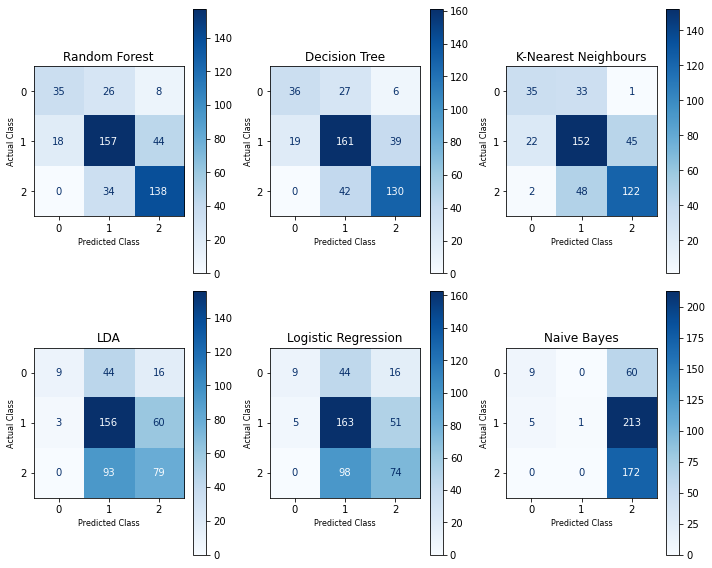

In [14]:
classification_models = ["Random Forest","Decision Tree","K-Nearest Neighbours","LDA","Logistic Regression","Naive Bayes"]

classifiers = [
    RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(weights='distance'),
    LogisticRegression(),
    LinearDiscriminantAnalysis(n_components=1),
    GaussianNB()
    ]


for name, model in zip(classification_models, classifiers):
    model.fit(x_train_class, y_train_class)
    y_pred_class = model.predict(x_test_class)
    print (name, "Model")
    print("% Accuracy for ",name," is ",metrics.accuracy_score(y_test_class, y_pred_class) * 100)
    print("Precision Score ",name," is ",metrics.precision_score(y_test_class, y_pred_class, average='weighted', labels=np.unique(y_pred_class)))
    print("Recall Score ",name," is ",metrics.recall_score(y_test_class, y_pred_class, average='weighted'))
    print("F1-Score Score ",name," is ",metrics.f1_score(y_test_class, y_pred_class, average='weighted', labels=np.unique(y_pred_class)))
    print("Evaluating Cross Validation")
    scores = cross_val_score(model, X_class, Y_class, cv=5)
    print("Scores:", scores)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    print ("mean score and 95% confidence interval of the score estimate are given by")
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("*------------END-----------*")
    
    
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,8))
for model, ax, name in zip(classifiers, axes.flatten(), classification_models):
    plot_confusion_matrix(model, x_test_class, y_test_class, ax=ax, values_format=None, cmap='Blues', include_values=True)
    ax.title.set_text(name)  
    ax.set_xlabel('Predicted Class', fontsize=8)
    ax.set_ylabel('Actual Class', fontsize=8)

plt.tight_layout()
plt.show()

In [20]:
y_test_class

array = np.array([y_test_class])

unique, counts = np.unique(array, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[['0' 69]
 ['1' 219]
 ['2' 172]]
